<a href="https://colab.research.google.com/github/bsaha205/Fall_22_PML/blob/main/PML_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1:

A nice machine learning problem that can be solved using Logistic Regression is acceptance probability of a graduate student in a reputed university like RPI. Here, a student has grade point average, GRE score, TOEFL score, number of publications, number of citations, number of extra-curriculam activities that can be considered as the features of the data. And the logistic regression model will use these features and catagorize the student to either "accept" or "reject" catagory. Here, it is a binary classification problem and logistic regression is certainly the best choiche here to solve this problem as it works with probabilites. So, it will basically predict the probability of the student to "accept" category. If the probability value is greater thatn or equal to 0.5, it will catagorize as "accept" otherwise "reject". 

# Task 2 (Exploring data)

In [143]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

In [144]:
# data source: https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset
# note: we have run only Training data
df = pd.read_csv('loan.csv')

In [145]:
# viewing the first few rows of the data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [146]:
# what's the data size?
df.shape

(614, 13)

In [147]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [148]:
# statistics of the dataset (numeric columns)
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [149]:
# statistics of the dataset (categorical columns)
df.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [150]:
# is the data imbalanced?
df.Loan_Status.value_counts(normalize=True) #normalizes the result

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

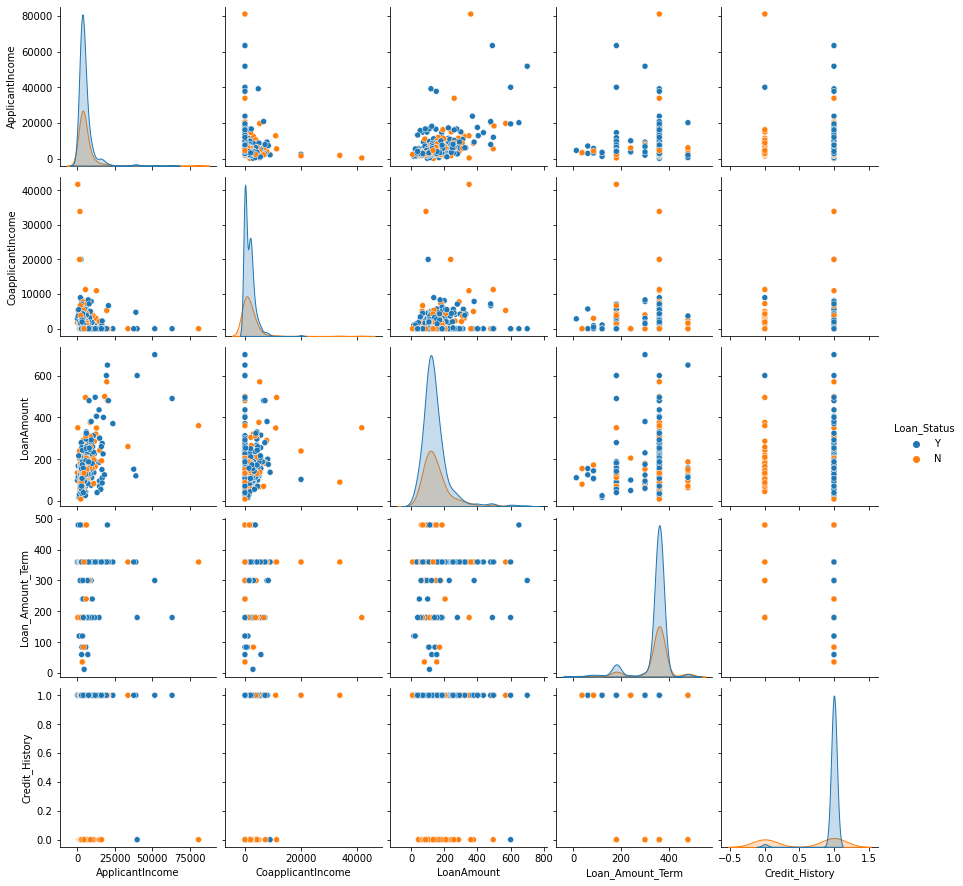

In [151]:
# ploting pairwise relationships in the dataset
sns.pairplot(df, hue='Loan_Status')

In [152]:
# here we split dataset by Gender and get the mean value of other numeric variables for each group 
df.groupby('Gender').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,,,,,
Female,4643.473214,1108.008929,126.697248,352.293578,0.831683
Male,5446.460123,1742.932352,149.265957,339.665272,0.847007


In [153]:
# useful for splitting the data into groups and aggregating them using different operators (e.g. sum or size)
# here we split dataset by Gender and get the size (i.e. count) for each group 
df.groupby('Gender').size()

Gender
Female    112
Male      489
dtype: int64

# Missing Value Computation

In [154]:
# which columns have a missing value?
df.isnull().any(axis=0) #axis 0 is rows so those are compressed

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [155]:
# how many rows have a missing value?
df.isnull().any(axis=1).sum()

134

In [156]:
# what percent of each column is missing?
df_nan = round(100*df.isna().sum()/df.shape[0],2)
index = df_nan.index

pd.DataFrame({ '% NaN': df_nan}, index=index).T

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
% NaN,0.0,2.12,0.49,2.44,0.0,5.21,0.0,0.0,3.58,2.28,8.14,0.0,0.0


In [157]:
# how many rows of each column is missing?
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Gender

We see there are 13 missing values in gender column. We can replace them with the value based on mean ApplicantIncome for each gender like below.

In [158]:
female_mean_income = df.groupby('Gender').mean()['ApplicantIncome']['Female']
male_mean_income = df.groupby('Gender').mean()['ApplicantIncome']['Male']

for i in range(df.shape[0]):
  if pd.isnull(df.at[i,'Gender']):
    replaced_value = 'Male'
    income_diff_with_male = abs(male_mean_income - df.at[i,'ApplicantIncome'])
    income_diff_with_female = abs(female_mean_income - df.at[i,'ApplicantIncome'])
    if(income_diff_with_female < income_diff_with_male):
      replaced_value = 'Female'
    # print("Replacing with", replaced_value)
    df.at[i,'Gender'] = replaced_value
    # df.at(i, 'Gender', replaced_value)

# df.isna().sum()
# df

### Married

We see there are only 3 missing values in Married column. We can replace them with the mode value.

In [159]:
# replace missing Married values with the mode
df.Married.fillna(df.Married.mode()[0], inplace=True)

## Dependents

In [160]:
# replace missing Dependents values with 0
df.Dependents.fillna(0, inplace=True)


## Self_Employed, Credit_History

We can replace these missing values with the value based on mean ApplicantIncome like what we did for gender.

In [161]:
# Self_Employed
no_mean_income = df.groupby('Self_Employed').mean()['ApplicantIncome']['No']
yes_mean_income = df.groupby('Self_Employed').mean()['ApplicantIncome']['Yes']

for i in range(df.shape[0]):
  if pd.isnull(df.at[i,'Self_Employed']):
    replaced_value = 'No'
    income_diff_with_no = abs(no_mean_income - df.at[i,'ApplicantIncome'])
    income_diff_with_yes = abs(yes_mean_income - df.at[i,'ApplicantIncome'])
    if(income_diff_with_yes < income_diff_with_no):
      replaced_value = 'Yes'
    df.at[i,'Self_Employed'] = replaced_value

In [162]:
# Credit_History
zero_mean_income = df.groupby('Credit_History').mean()['ApplicantIncome'][0]
one_mean_income = df.groupby('Credit_History').mean()['ApplicantIncome'][1]

for i in range(df.shape[0]):
  if pd.isnull(df.at[i,'Credit_History']):
    replaced_value = 0
    income_diff_with_zero = abs(zero_mean_income - df.at[i,'ApplicantIncome'])
    income_diff_with_one = abs(one_mean_income - df.at[i,'ApplicantIncome'])
    if(income_diff_with_one < income_diff_with_zero):
      replaced_value = 1
    df.at[i,'Credit_History'] = replaced_value

## LoanAmount, Loan_Amount_Term

We can replace these missing values simply with the mode value.

In [163]:
# replace missing LoanAmount values with the mode
df.LoanAmount.fillna(df.LoanAmount.mode()[0], inplace=True)

In [164]:
# replace missing Loan_Amount_Term values with the mode
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0], inplace=True)

In [165]:
df_nan = round(100*df.isna().sum()/df.shape[0],2)
index = df_nan.index

pd.DataFrame({ '% NaN': df_nan}, index=index).T

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
% NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Wow! There is no missing value anymore!

# Make Dataset Ready

Now it is time to make the dataset ready for the model, for example replace all the categorized values with numerical values.

As we don't need Loan_ID for the logistic regression model, we can delete this entire column.

In [166]:
# deleting Loan_ID 
df = df.drop('Loan_ID', axis=1)

In [167]:
# replace male with 0 and female with 1
df['Gender'] = df['Gender'].replace(['Male'], 0)
df['Gender'] = df['Gender'].replace(['Female'], 1)

In [168]:
# replace married with 0 and un-married with 1
df['Married'] = df['Married'].replace(['Yes'], 0)
df['Married'] = df['Married'].replace(['No'], 1)

In [169]:
# replace Dependents of 3+ with 3
df['Dependents'] = df['Dependents'].replace(['3+'], 3)
df['Dependents'] = df['Dependents'].replace(['0'], 0)
df['Dependents'] = df['Dependents'].replace(['1'], 1)
df['Dependents'] = df['Dependents'].replace(['2'], 2)

In [170]:
# replace Education Graduate with 0 and Not Graduate with 1
df['Education'] = df['Education'].replace(['Graduate'], 0)
df['Education'] = df['Education'].replace(['Not Graduate'], 1)

In [171]:
# replace Self_Employed Yes with 0 and No with 1
df['Self_Employed'] = df['Self_Employed'].replace(['Yes'], 0)
df['Self_Employed'] = df['Self_Employed'].replace(['No'], 1)

In [172]:
# replace Property_Area Rural with 0, Semiurban with 1 and Urban with 2
df['Property_Area'] = df['Property_Area'].replace(['Rural'], 0)
df['Property_Area'] = df['Property_Area'].replace(['Semiurban'], 1)
df['Property_Area'] = df['Property_Area'].replace(['Urban'], 2)

In [173]:
# replace Loan_Status Y with 0 and N with 1
df['Loan_Status'] = df['Loan_Status'].replace(['Y'], 0)
df['Loan_Status'] = df['Loan_Status'].replace(['N'], 1)

# Task 3

Logistic Regression Implementation

In [199]:
# independent variables
X = df.drop(['Loan_Status'], axis=1)
# dependent/target variable
y = df.Loan_Status

# divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
# scale the data between 0 and 1
transformer = Normalizer(norm='max').fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [201]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [218]:
n = X_train.shape[0]
d = X_train.shape[1]
w = np.random.rand(d)
b = np.random.rand(1)
print('n:', n, ' d:', d, ' b:', b)
print('w:', w)

iterations = 1000
learning_rate = .1

for i in range(iterations):
  A = sigmoid(np.dot(w, X_train.T) + b)

  cost = -1/n * np.sum(y_train * np.log(A) + (1-y_train) * (np.log(1-A)))
  dw = np.dot((A-y_train).T, X_train)/n
  db = np.sum(A-y_train)/n 

  # print('dw:', dw)
  # print('db:', db)
  w = w - learning_rate*dw
  b = b - learning_rate*db

print('b:', b)
print('w:', w)

n: 491  d: 11  b: [0.66793989]
w: [0.19627004 0.11224319 0.65772748 0.7206746  0.7460255  0.98670557
 0.24127058 0.58743034 0.02630852 0.47141019 0.28317347]
b: [-0.33829916]
w: [ 0.1964629   0.11269997  0.65737652  0.72098379  0.74583603 -0.3712778
 -0.44992915  0.57784804 -0.0322464   0.46884313  0.28281446]


In [219]:
# Predict
y_pred = np.round(sigmoid(np.dot(w, X_test.T) + b))
score = float(sum(y_pred == y_test))/ float(len(y_test))

print(score)

0.6504065040650406
